In [15]:
import numpy as np
import pickle
from model import *
import matplotlib.pyplot as plt 

In [2]:
visualization_arr = np.load("../data/image_cluster/visualization.npy")

In [4]:
visualization_arr.shape

(10000, 784)

In [8]:
kmeans = pickle.load(open("./kmeans.pkl", "rb"))

In [11]:
model = AutoEncoder_DNN2().cuda()
model.load_state_dict(torch.load("./param/besttime: 20180102_1519"))
g = batch_generator(visualization_arr, batch_size=300, shuffle=False, volatile=True)
reduced_image_array = []
pdb.set_trace()
for batch in tqdm(g):
    X_, code = model(batch["X"])
    reduced_image_array.append(code.cpu().data.numpy())
reduced_image_array = np.concatenate(reduced_image_array, axis=0)
print(reduced_image_array.shape)

--Return--
> <ipython-input-11-26d50ddb20f8>(5)<module>()->None
-> pdb.set_trace()
(Pdb) cont


34it [00:01, 27.97it/s]

(10000, 32)


In [13]:
y_ = kmeans.predict(reduced_image_array)

In [16]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
reduced_tsne = tsne.fit_transform(reduced_image_array)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.019s...
[t-SNE] Computed neighbors for 10000 samples in 2.484s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 53.629263
[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.955818
[t-SNE] Error after 300 iterations: 2.593786


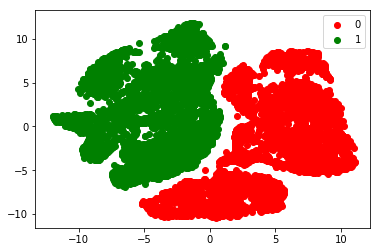

In [36]:

for predict_class in np.unique(y_):
    indices = np.where(y_ == predict_class)
    color = "red" if predict_class == 0 else "green"
    plt.scatter(reduced_tsne[indices, 0], reduced_tsne[indices, 1], c=color, label=str(predict_class))
    
plt.legend()
plt.show()

In [34]:
np.unique(y_)

array([0, 1], dtype=int32)

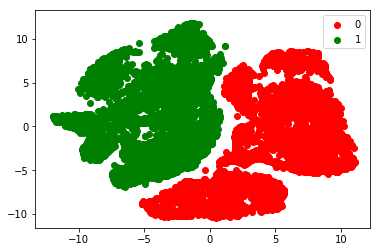

In [39]:
point = reduced_tsne.shape[0] // 2
plt.scatter(reduced_tsne[point:, 0], reduced_tsne[point:, 1], c="red", label="0")
plt.scatter(reduced_tsne[:point, 0], reduced_tsne[:point, 1], c="green", label="1")

    
plt.legend()
plt.show()

In [44]:
y = np.array([1] * point + [0] * point)
tp = np.sum(np.logical_and(y_ == y, y == 1))
tn = np.sum(np.logical_and(y_ == y, y == 0))
fp = np.sum(np.logical_and(y_ != y, y == 1))
fn = np.sum(np.logical_and(y_ != y, y == 0))
print(tp)
print(tn)
print(fp)
print(fn)

5000
4999
0
1


In [46]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * precision * recall / (precision + recall)
print(f1)
print(precision)
print(recall)

0.9999000099990001
1.0
0.9998000399920016
